In [73]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [92]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv("NSL_Dataset.csv", header=None, names = col_names)


In [93]:
df.shape

(125973, 42)

In [94]:
#split into features and outcomes

x = df.drop(['label'], axis = 1 )
y = df[['label']]


In [95]:
#turn categorical data into dummy variables 

dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

x = x.drop(['protocol_type','service','flag'], axis = 1)

#x = x.join(x)

In [96]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

#dummy variable trap 
x = merged.drop(['icmp'], axis = 1)

In [97]:
merged_1= pandas.concat([x, dummies_2], axis = 'columns')

#dummy variable trap 

x = merged_1.drop(['whois'], axis = 1)

In [98]:
merged_2= pandas.concat([x, dummies_3], axis = 'columns')

x = merged_2.drop(['SH'], axis = 1)

In [99]:
x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,1.616978,-0.053906,-0.031767,-0.019726,-1.211901
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150


In [101]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 119 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (125973, 119)
Transformed Shape: (125973, 2)
[[-1.00608009 -0.1913688 ]
 [-0.26121248  1.41682502]
 [ 4.36869711 -1.68757589]
 ...
 [-0.87299452 -0.71870499]
 [ 4.50750309 -1.92864967]
 [-1.50163837 -0.45250432]]


In [102]:
#turn malicious packets into true and normal into false

y['Target'] = y['label'] != 'normal'
y = y.drop('label', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [143]:
#Split into test and training sets. 20% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [144]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(25195, 2)
(25195, 2)
(100778, 2)
(100778, 2)


In [152]:
# Create Neural Network, with 4 hidden layers and 2 output layers being subjected to the softmax probability function
# and 2 input layers which was reduced by PCA
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1), bias_initializer = initializers.Constant(0.3)))
model.add(Dropout(0.2))
model.add(Dense(160, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.3), )) 
model.add(Dropout(0.2))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.3), ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.3), ))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

optimizer = Adam(lr=1e-4, beta_1=0.99, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=3, verbose=3, mode='auto', restore_best_weights=True, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 10s 101us/step - loss: 0.3554 - acc: 0.8824 - val_loss: 0.1779 - val_acc: 0.9257
Epoch 2/100
100778/100778 [==============================] - 9s 91us/step - loss: 0.2054 - acc: 0.9142 - val_loss: 0.1688 - val_acc: 0.9269
Epoch 3/100
100778/100778 [==============================] - 8s 81us/step - loss: 0.1885 - acc: 0.9208 - val_loss: 0.1650 - val_acc: 0.9242
Epoch 4/100
100778/100778 [==============================] - 8s 82us/step - loss: 0.1787 - acc: 0.9260 - val_loss: 0.1577 - val_acc: 0.9301
Epoch 5/100
100778/100778 [==============================] - 8s 82us/step - loss: 0.1724 - acc: 0.9280 - val_loss: 0.1559 - val_acc: 0.9313
Epoch 6/100
100778/100778 [==============================] - 9s 89us/step - loss: 0.1664 - acc: 0.9315 - val_loss: 0.1511 - val_acc: 0.9329
Epoch 7/100
100778/100778 [==============================] - 9s 88us/step - loss: 0.1636 - acc: 0.9327 - va

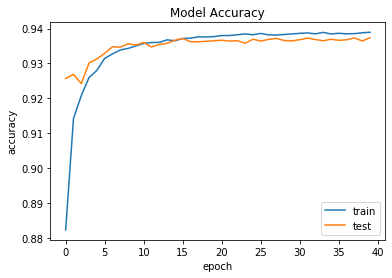

In [153]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

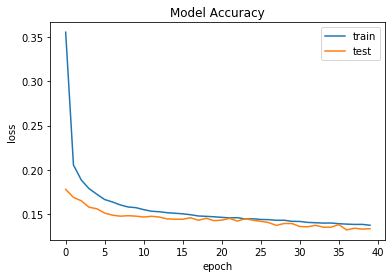

In [154]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [155]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, predictors)

In [157]:
cm

array([[13320,   102],
       [ 1491, 10282]])

In [158]:

#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 13320
FP = 102
FN = 1491
TN = 10282

In [159]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy:  ", Acc * 100, '%')

Accuracy:   93.6773169279619 %


In [160]:
# Precision

PPV = ((TP)/(TP+FP))

print("Precision", PPV * 100, '%')

Precision 99.24005364327225 %


In [161]:
# Recall 

TPR = ((TP)/(TP + FN))

print("Recall: ", TPR * 100, '%')

Recall:  89.93315778813044 %


In [162]:
weights = model.layers[0].get_weights()[0]

biases = model.layers[0].get_weights()[1]

In [163]:
weights

array([[-0.28720412,  0.18459384,  0.6836856 ,  0.5437398 , -1.1158584 ,
        -0.13526447,  1.1648644 ,  0.35779437,  1.5817791 , -1.1692113 ,
        -1.2604862 , -1.4834087 ,  1.166839  , -0.30825603, -0.00746316,
        -0.25313568, -1.2777485 ,  0.77951   , -0.1757714 ,  0.0735562 ,
         0.7033993 ,  1.8283923 ,  0.12341286, -0.04445767,  1.9018486 ,
         1.5015203 , -1.8785689 , -1.7643595 , -0.7797831 ,  2.3215919 ,
        -0.35191762,  1.11279   ,  0.67243105,  1.114305  ,  1.8636287 ,
         2.0455031 ,  0.49507722, -0.61292905, -1.3518962 ,  1.4987679 ,
        -1.0255954 ,  2.0280793 , -0.6355088 , -0.7582426 ,  0.20323554,
         0.09280744,  1.2911578 ,  1.7514297 ,  2.1036873 , -0.18509501,
        -0.36257833, -0.784956  ,  0.09943074,  0.12856203,  0.15979539,
         0.1145408 , -0.34507954, -0.20543446,  1.5486424 , -1.3889315 ,
        -0.65846896, -0.26617083, -1.6159631 , -1.8031719 , -1.7734059 ,
         1.2309023 ,  1.9548002 ,  0.3402118 ,  1.2

In [164]:
biases

array([-1.32066265e-01,  6.48853004e-01, -7.82416575e-03,  4.11361903e-01,
       -8.33618641e-02,  7.36425936e-01,  2.71984547e-01,  5.93921483e-01,
       -5.77743277e-02,  2.25434694e-02, -1.15262819e-02, -1.79410189e-01,
        6.45960048e-02,  3.20991039e-01,  5.39643586e-01,  3.04628879e-01,
       -1.38841748e-01, -1.66920815e-02,  3.84423703e-01,  4.80042666e-01,
        3.47073317e-01,  4.90949936e-02,  3.56494367e-01,  1.61950976e-01,
       -2.21529230e-01, -1.56011460e-02, -3.25005084e-01, -3.71601880e-01,
        8.68534669e-02, -1.37280479e-01,  3.50899458e-01,  1.18515082e-02,
        6.61302090e-01,  3.66684109e-01,  1.29231662e-01, -1.30690649e-01,
        6.16764784e-01, -7.72639140e-02, -2.17217848e-01, -1.34707674e-01,
        1.34502962e-01,  1.39880762e-01,  8.35169628e-02, -1.69157058e-01,
        7.05611169e-01,  2.74630576e-01, -2.05998093e-01, -1.48949236e-01,
       -1.02809720e-01,  3.22972119e-01,  2.19634295e-01,  3.76767926e-02,
        2.95078367e-01,  